In [42]:
import glob

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import plotly.express as px
import plotly.graph_objects as go

In [87]:
columns=['approach', 'sort', 'world_size', 'construct', 'threads', 'size', 'duration']
# results = pd.read_csv('../results/test_results.csv', names=columns)
# results = pd.read_csv('../results/mpi_sort_results_backup.csv', names=columns)
results = pd.read_csv('../results/mpi_sort_results.csv', names=columns)

# results['approach'] = results['approach'].str.replace('merge', 'mpi:merge')
# results['approach'] = results['approach'].str.replace('partition', 'mpi:partition')

In [88]:
results

,approach,sort,world_size,construct,threads,size,duration
0,merge,enumeration_sort,16,single,1,10000,0.013800
1,partition,enumeration_sort,16,single,1,10000,0.033126
2,merge,merge_sort,16,single,1,10000,0.001347
3,partition,merge_sort,16,single,1,10000,0.001445
4,merge,quick_sort,16,single,1,10000,0.001191
...,...,...,...,...,...,...,...
1291,partition,quick_sort,2,tasks,8,100000000,15.529089
1292,merge,merge_sort,2,tasks,8,100000000,14.271214
1293,partition,merge_sort,2,tasks,8,100000000,14.898220
1294,merge,quick_sort,2,tasks,8,100000000,15.227301


In [89]:
for col in results.columns:
    if col != 'duration':
        print(f'{col}: {results[col].unique()}')

approach: ['merge' 'partition' 'serial']
sort: ['enumeration_sort' 'merge_sort' 'quick_sort']
world_size: [16  8  4  1  2]
construct: ['single' 'parallel' 'tasks']
threads: [1 2 4 8]
size: [    10000    100000   1000000  10000000 100000000]


In [90]:
df = (
    results
    .groupby(['approach', 'sort', 'world_size', 'construct', 'threads', 'size'])['duration'].mean()
    .to_frame('duration')
    .reset_index()
)
df

,approach,sort,world_size,construct,threads,size,duration
0,merge,enumeration_sort,2,parallel,2,10000,0.066418
1,merge,enumeration_sort,2,parallel,2,100000,6.140236
2,merge,enumeration_sort,2,parallel,4,10000,0.035189
3,merge,enumeration_sort,2,parallel,4,100000,3.110686
4,merge,enumeration_sort,2,parallel,8,10000,0.021299
...,...,...,...,...,...,...,...
427,serial,quick_sort,1,tasks,8,10000,0.001542
428,serial,quick_sort,1,tasks,8,100000,0.018815
429,serial,quick_sort,1,tasks,8,1000000,0.220739
430,serial,quick_sort,1,tasks,8,10000000,2.501303


In [96]:
pd.set_option('display.max_rows', None)

In [124]:
summary_table = (
    df.loc[df['size'] == 100000]
    .drop(columns=['construct', 'size'])
    .pivot(index=['world_size','threads'], columns=['approach','sort'])
    ['duration']
)

# parallel = summary_table['duration','partition']
# parallel = parallel.loc[parallel.index.get_level_values('world_size') != 1]
# parallel
# serial = summary_table['serial']

In [133]:
parallel = summary_table.loc[summary_table.index.get_level_values('world_size') != 1, ['merge','partition']]
serial = summary_table.loc[summary_table.index.get_level_values('world_size') == 1, ['serial']]

In [136]:
display(serial, parallel)

approach                     serial                      
sort               enumeration_sort merge_sort quick_sort
world_size threads                                       
1          1              24.007136   0.013737   0.015833
           2              24.378864   0.011116   0.018532
           4              12.296599   0.008322   0.018646
           8               6.217998   0.006515   0.018815

approach                      merge                              partition  \
sort               enumeration_sort merge_sort quick_sort enumeration_sort   
world_size threads                                                           
2          1               6.038721   0.008327   0.008935         8.657768   
           2               6.140236   0.010269   0.009826         8.810228   
           4               3.110686   0.010378   0.009681         4.467161   
           8               1.842067   0.010597   0.009894         2.402259   
4          1               1.593489   0.005535   0.005746         5.442620   
           2               1.563956   0.005999   0.005888         5.272327   
           4               0.920553   0.006152   0.005737         2.712954   
           8               0.743516   0.007053   0.006493         1.540687   
8          1               0.436472   0.004981   0.004565         1.974359   
           2               0.481349   0.004380   0.003903         1.846041   
           4               0.383676   0.004912   0.004600         1.040454   
           8               0.364904   0.004751   0.004575         0.743908   
16         1               0.122133   0.004434   0.004267         4.101196   
           2               0.218982   0.004546   0.004389         4.178977   
           4               0.201651   0.006806   0.003960         2.191554   
           8               0.188221   0.005598   0.003904         1.286648   

approach                                  
sort               merge_sort quick_sort  
world_size threads                        
2          1         0.009071   0.010455  
           2         0.011311   0.011801  
           4         0.011289   0.011717  
           8         0.011381   0.011767  
4          1         0.007574   0.008274  
           2         0.008991   0.009124  
           4         0.009223   0.009095  
           8         0.009313   0.009342  
8          1         0.005078   0.005223  
           2         0.005984   0.005944  
           4         0.006668   0.006798  
           8         0.006332   0.006280  
16         1         0.008032   0.007845  
           2         0.010056   0.009034  
           4         0.010396   0.009136  
           8         0.009622   0.008802

In [219]:
serial_df = (
    serial
    .reset_index('world_size', drop=True)
    .reset_index()
    .melt(id_vars=['threads'], value_name='duration')
)

serial_df.drop(columns='approach', inplace=True)
serial_df.sort = serial_df.sort.str.replace('_sort', '')
serial_df = serial_df.rename(columns={'duration': 'Duration (s)', 'threads': 'OpenMP Threads', 'sort': 'Sorting Algorithm'})
serial_df

,OpenMP Threads,Sorting Algorithm,Duration (s)
0,1,enumeration,24.0071
1,2,enumeration,24.3789
2,4,enumeration,12.2966
3,8,enumeration,6.2180
4,1,merge,0.0137
5,2,merge,0.0111
6,4,merge,0.0083
7,8,merge,0.0065
8,1,quick,0.0158
9,2,quick,0.0185


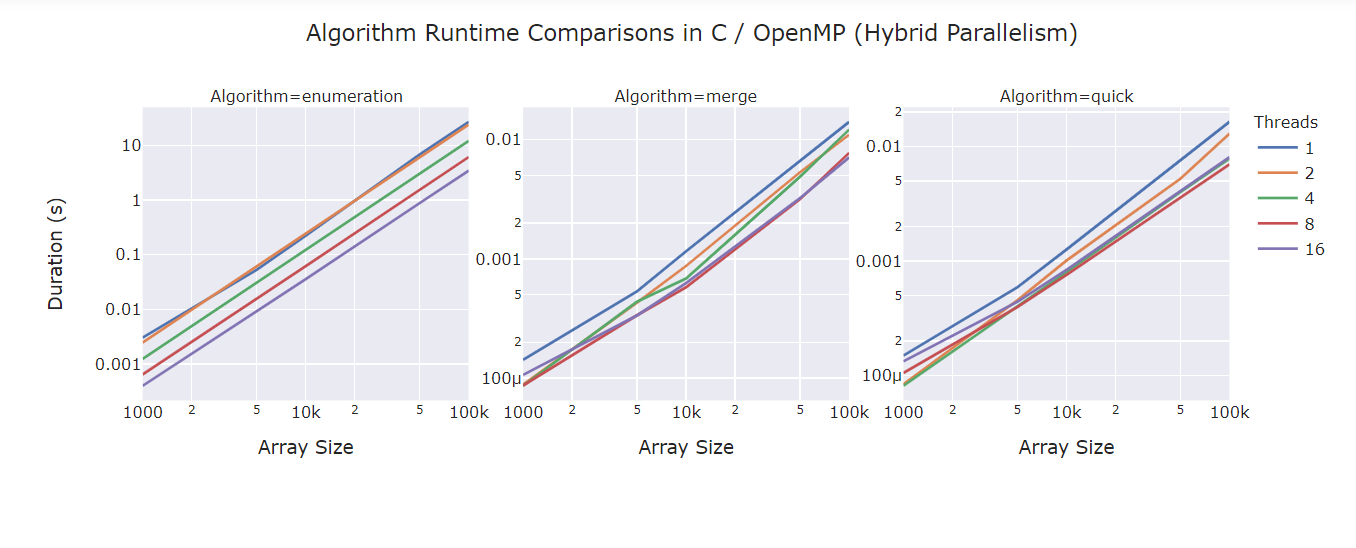

In [221]:
px.line(
    serial_df,
    x='OpenMP Threads', y='Duration (s)',
    color='Sorting Algorithm',
    height=600,
    log_x=True, log_y=True,
    title='Single Process Sorting Algorithms: Threads vs. Duration'
)

### IO Experiments

In [144]:
io = pd.concat([
    pd.read_csv(
        f'../results/final/{approach}_io_results.csv',
        names=['io', 'approach', 'world_size', 'size', 'duration']
    ) for approach in ('serial', 'parallel')
])

In [165]:
pd.options.display.float_format = '{:,.4f}'.format

In [166]:
io_summary = (
    io.drop(columns='approach')
    .sort_values(['io', 'world_size'])
    .pivot(index=['size'], columns=['io', 'world_size'])
    ['duration']
)

display(io_summary)

io           read                                     write                \
world_size     1      2      4      8      16     24     1      2      4    
size                                                                        
1000       0.0000 0.0002 0.0004 0.0006 0.0013 0.1044 0.0001 0.0013 0.0018   
10000      0.0000 0.0002 0.0003 0.0005 0.0009 0.0505 0.0001 0.0002 0.0004   
100000     0.0003 0.0004 0.0004 0.0006 0.0010 0.0459 0.0005 0.0005 0.0009   
1000000    0.0036 0.0025 0.0015 0.0014 0.0016 0.0609 0.0075 0.0035 0.0051   
10000000   0.0378 0.0206 0.0127 0.0098 0.0080 0.0442 0.0860 0.0303 0.0293   
100000000  0.3518 0.2037 0.1122 0.0843 0.0694 0.1439 0.9280 0.2622 0.2761   
1000000000 3.0032 1.7220 0.9151 0.6454 0.5662 0.5831 7.2551 2.3322 2.5684   

io                               
world_size     8      16     24  
size                             
1000       0.0032 0.0032 0.0832  
10000      0.0006 0.0010 0.0587  
100000     0.0009 0.0018 0.0612  
1000000    0.0048 0.0053 0.0895  
10000000   0.0355 0.0374 0.1366  
100000000  0.2923 0.3130 0.4672  
1000000000 2.5032 2.8186 3.2280

In [ ]:

    facet_col_spacing=0.05,
    facet_row='Construct',
    template='seaborn',
    log_x=True,
#     log_y=True,
    title=f'Algorithm Runtime Comparisons in C / OpenMP ({if_cutoff})',
    height=600,
    labels={
        "Duration": "Duration (s)",
        "Size": "Array Size",
     },

In [186]:
px.line(
    (
        io_summary['read']
        .reset_index()
        .melt(id_vars='size', value_name='duration')
        .rename(columns={'world_size': 'World Size'})
    ),
    x='size', y='duration', color='World Size',
    height=500, width=700, template='seaborn',
    log_x=True, #log_y=True,
    labels={'duration': 'Duration (s)', 'size': 'Array Size'},
    title='Duration for IO Read Time vs. Array Size'
)
    

In [187]:
px.line(
    (
        io_summary['write']
        .reset_index()
        .melt(id_vars='size', value_name='duration')
        .rename(columns={'world_size': 'World Size'})
    ),
    x='size', y='duration', color='World Size',
    height=500, width=700, template='seaborn',
    log_x=True, #log_y=True,
    labels={'duration': 'Duration (s)', 'size': 'Array Size'},
    title='Duration for IO Write Time vs. Array Size'
)
    

In [210]:
fig = px.line(
    (
        io_summary
        .reset_index()
        .melt(id_vars='size', value_name='duration')
        .rename(columns={'world_size': 'World Size', 'io': "IO"})
    ),
    x='size', y='duration', color='World Size',
    facet_col='IO', facet_col_spacing=0.03,
    height=450, width=900, template='seaborn',
    log_x=True, #log_y=True,
    labels={'duration': 'Duration (s)', 'size': 'Array Size'},
    title='Performance Chart for IO Time vs. Array Size'
)

# plots for sections/tasks for quick/merge sort
fig.update_yaxes(matches=None)
fig.update_yaxes(showticklabels=True, col=2) # assuming second facet
fig.show()